# Open Government Data, Canton Zurich

### **Dataset**: Staatsquote des Kantons Zürich

### **Description**: Die Staatsquote entspricht den «konsolidierten Gesamtausgaben» in Prozent des kantonalen Bruttoinlandprodukts (BIP). Die «konsolidierten Gesamtausgaben» umfassen die Ausgaben (Aufwand ohne Abschreibungen, Einlagen in Bestandeskonti von Fonds im Eigen- und Fremdkapital, durchlaufende Beiträge und interne Verrechnungen) plus Bruttoinvestitionen. Die konsolidierten Gesamtausgaben werden durch die Eidgenössischen Finanzverwaltung (EFV) berechnet. Das BIP des Kantons Zürich wird vom Bundesamt für Statistik (BFS) berechnet. Beide Wirtschaftsindikatoren werden mit einer zeitlichen Verzögerung von zwei Jahren veröffentlicht. Vorliegend wird die Staatsquote des Kantons ohne Gemeinden ausgewiesen. Für die interkantonale Vergleichbarkeit müsste die Staatsquote des Kantons und seiner Gemeinden betrachtet werden, aufgrund der je nach Kanton unterschiedlichen Aufgabenteilungen zwischen Kanton und Gemeinden. 

*Autogenerated Jupyter Notebook and basic Python code for data set* **1401@finanzverwaltung-kanton-zuerich**.

## Dataset profile
- **Issued** `2022-06-07T11:05:44`
- **Modified** `2022-06-14T15:27:16`
- **Startdate** `2008-12-31`
- **Enddate** `2019-12-31`
- **Theme** `['Volkswirtschaft']`
- **Keyword** `['finanzkennzahlen', 'oeffentliche_finanzen', 'staatsfinanzen', 'ogd']`
- **Publisher** `['Finanzverwaltung des Kantons Zürich']`
- **Landingpage** `None`


## Import Python modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [2]:
# Distribution 0
# Ktzhdistid               : 2738
# Title                    : Staatsquote des Kantons Zürich ab 2008
# Description              : Variabeln: 'gesamtausgaben' und 'bruttoinlandprodukt' in Tausend CHF.
# Issued                   : 2022-06-07T11:05:44
# Modified                 : 2022-06-09T10:27:53
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00001401_00002738.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00001401_00002738.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [3]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [4]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 12 rows (observations) and 6 columns (variables).
There seem to be 0 exact duplicates in the data.


In [5]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jahr                    12 non-null     int64  
 1   raumeinheit             12 non-null     object 
 2   gebiet_name             12 non-null     object 
 3   gesamtausgaben          12 non-null     int64  
 4   bruttoinlandprodukt     12 non-null     int64  
 5   staatsquote_in_prozent  12 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.4 KB


In [6]:
df.head()

,jahr,raumeinheit,gebiet_name,gesamtausgaben,bruttoinlandprodukt,staatsquote_in_prozent
0,2019,Kanton,Zürich,14369818,157389224,9.1
1,2018,Kanton,Zürich,13867889,158752967,8.7
2,2017,Kanton,Zürich,13542519,150715347,9.0
3,2016,Kanton,Zürich,13048225,147367220,8.9
4,2015,Kanton,Zürich,13230172,146396153,9.0


In [7]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,0,5,8
jahr,2019,2014,2011
raumeinheit,Kanton,Kanton,Kanton
gebiet_name,Zürich,Zürich,Zürich
gesamtausgaben,14369818,12636136,14423883
bruttoinlandprodukt,157389224,146151149,139014592
staatsquote_in_prozent,9.1,8.6,10.4


In [8]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,raumeinheit,gebiet_name
count,12,12
unique,1,1
top,Kanton,Zürich
freq,12,12


In [9]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(include='number'))

,jahr,gesamtausgaben,bruttoinlandprodukt,staatsquote_in_prozent
count,12.00,12.00,12.00,12.00
mean,"2,013.50","12,804,157.33","144,641,810.08",8.84
std,3.61,"1,129,911.32","8,098,653.76",0.56
min,"2,008.00","11,178,312.00","133,708,140.00",8.20
25%,"2,010.75","12,033,726.25","138,387,486.00",8.57
50%,"2,013.50","12,842,180.50","144,534,874.00",8.70
75%,"2,016.25","13,623,861.50","148,204,251.75",9.00
max,"2,019.00","14,423,883.00","158,752,967.00",10.40


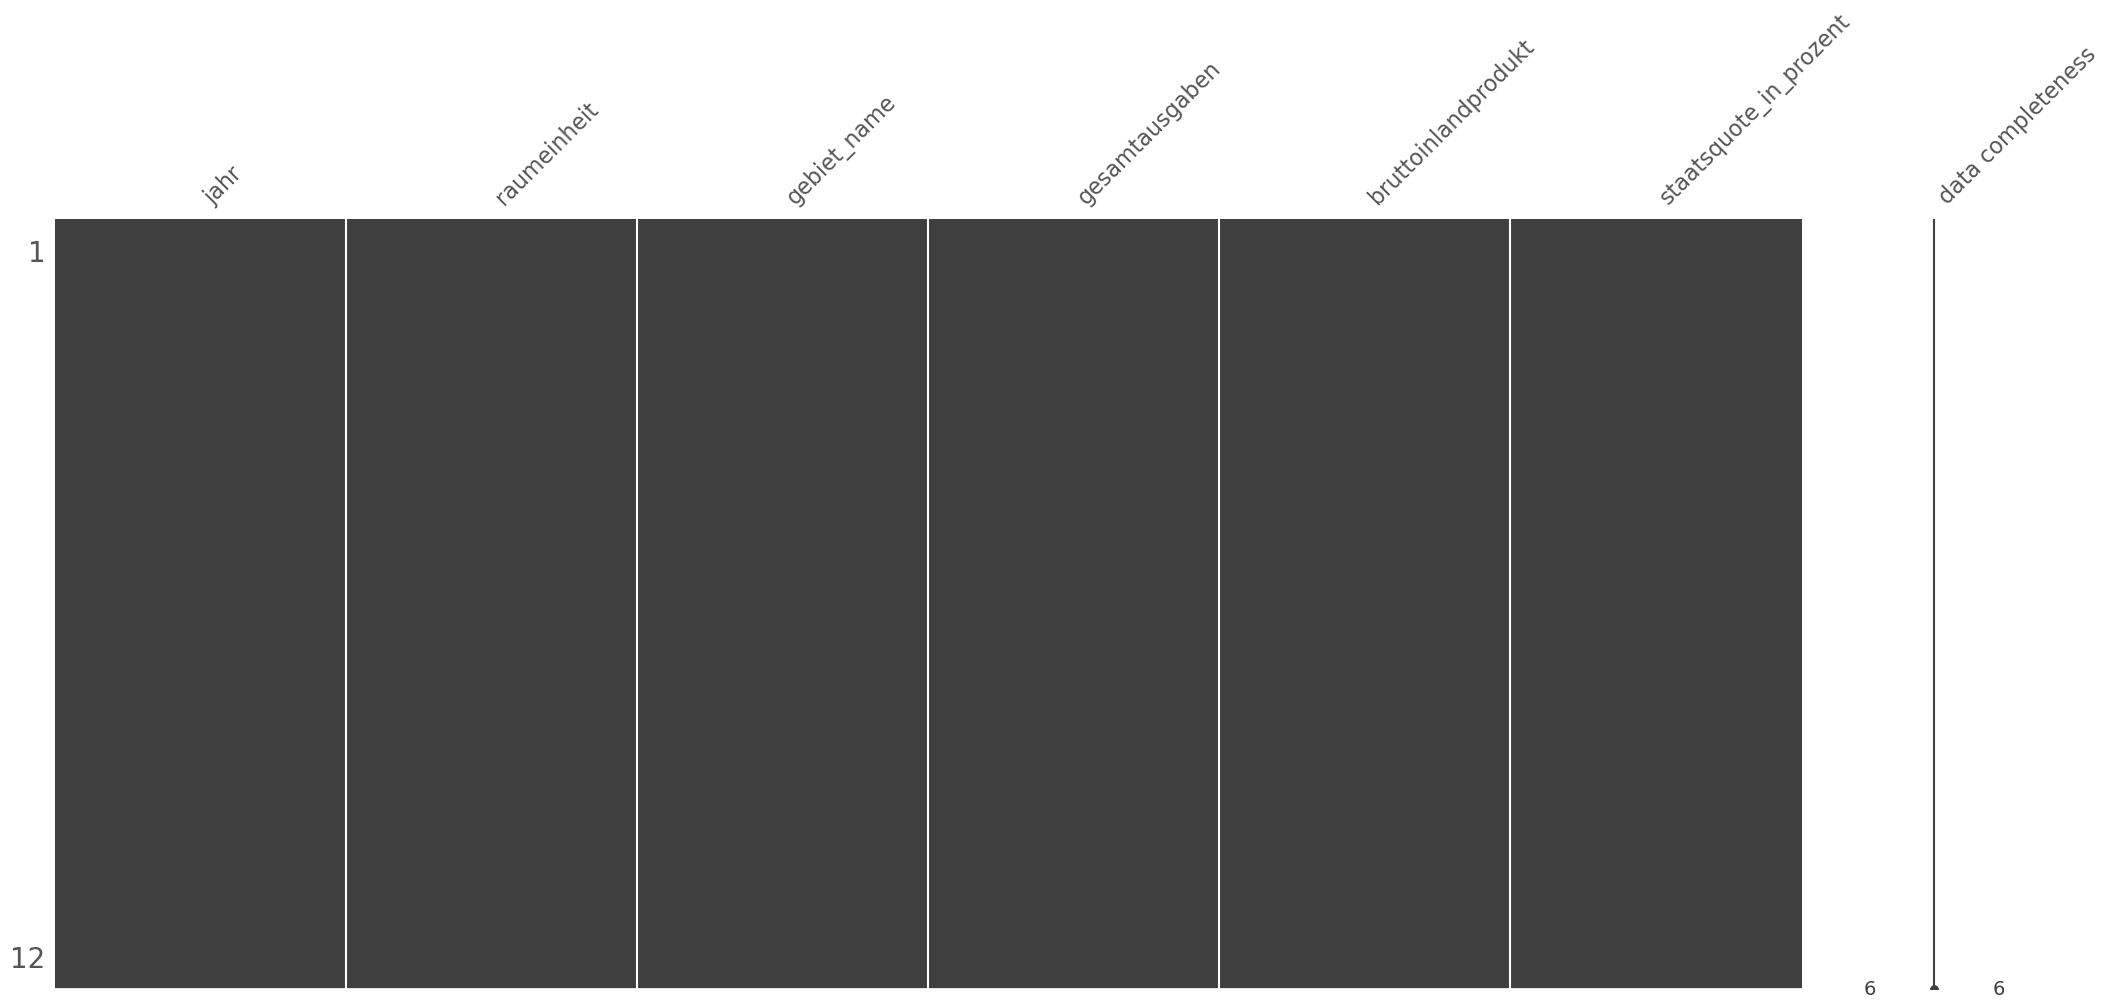

In [10]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

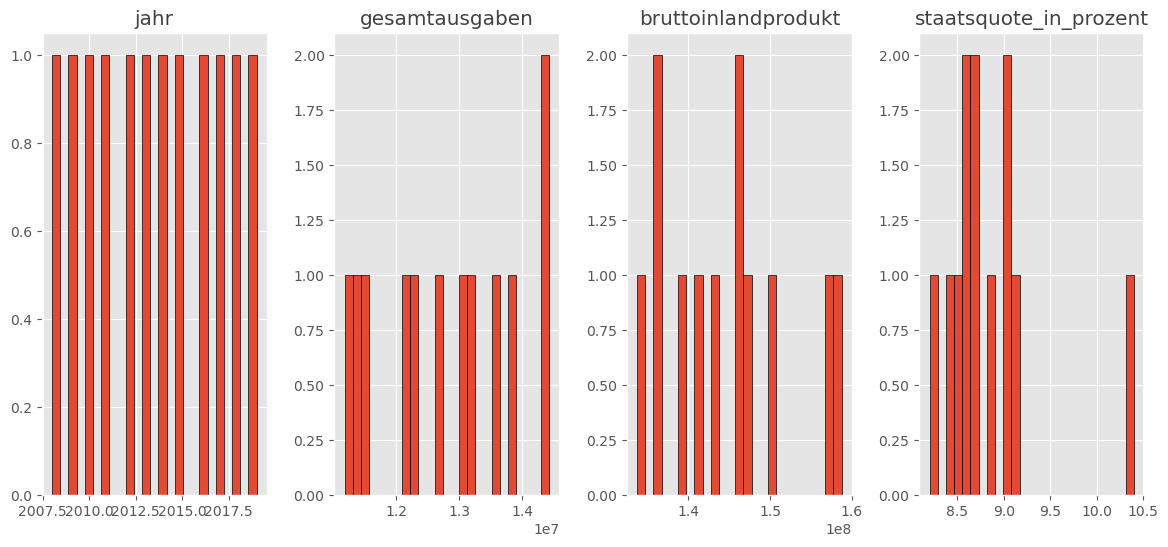

In [11]:
# plot a histogram for each numerical feature
df.hist(bins=25, layout=(-1, 5), edgecolor='black');

In [12]:
# continue your code here...

**Contact**: Finanzverwaltung des Kantons Zürich | Steuerung Finanzhaushalt | finanzhaushalt@fdfv.zh.ch